# 6.1 Particles distribution and Emission region

In this tutorial, we describe the non-thermal particle distributions available in `agnpy` and illustrate how to define the region containing and accelerating them, usually referred to as _emission_ region.

In [2]:
# import numpy, astropy and matplotlib for basic functionalities
import numpy as np
import astropy.units as u
from astropy.constants import m_e, m_p, c
from astropy.coordinates import Distance
import matplotlib.pyplot as plt
from IPython.display import Image

In [3]:
# import agnpy classes
from agnpy.spectra import PowerLaw, BrokenPowerLaw, LogParabola
from agnpy.emission_regions import Blob

## 6.1.1 Definition of particles distributions

The `agnpy.spectra` module provides classes describing the energy distributions of particles accelerated in the jets. The energy distribution is commonly represented by an analytical function, usually a power law (and its broken, curved, and cut-off variations), returning the volume density of particles, $n [{\rm cm}]^{-3}$, as a function of their Lorentz factor, $\gamma$. For the simplest power law:

\begin{equation}
n(\gamma) = k\,\gamma^{-p} \, H(\gamma; \gamma_{\rm min}, \gamma_{\rm max}),
\end{equation}

where $k$ is an amplitude in ${\rm cm}^{-3}$, $p$ the spectral index, and the Heaviside function ensures null values outside the range $[\gamma_{\rm min}, \gamma_{\rm max}]$. Several analytical functions are available, along with a function that interpolates an series of $n [{\rm cm}]^{-3}$ values.

We illustrate, in the following, how to declare an electron and a proton particle distributions

In [4]:
# define an electron distribution
n_e = BrokenPowerLaw(
    k=1e-8 * u.Unit("cm-3"),
    p1=1.9,
    p2=2.6,
    gamma_b=1e4,
    gamma_min=10,
    gamma_max=1e6,
    mass=m_e,
)

# define a proton distribution
n_p = PowerLaw(k=0.1 * u.Unit("cm-3"), p=2.3, gamma_min=10, gamma_max=1e6, mass=m_p)

As we can see, the parameter `mass` distinguishes the particle type.

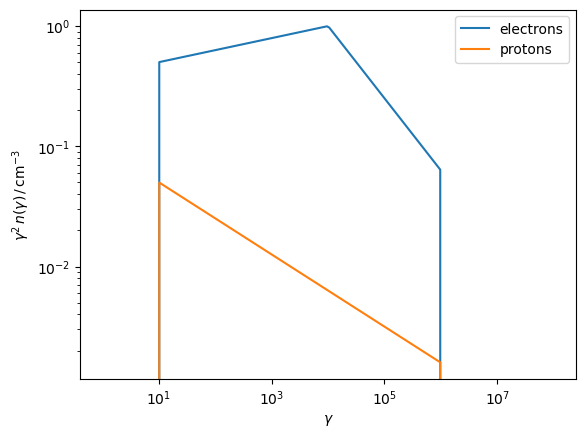

In [5]:
# we can plot the particles distribution defined above
# we can represent them multiplied by an arbitrary power of gamma
fig, ax = plt.subplots()

n_e.plot(ax=ax, gamma_power=2, label="electrons")
n_p.plot(ax=ax, gamma_power=2, label="protons")

ax.legend()
plt.show()

## 6.1.2 Definition of the emission region

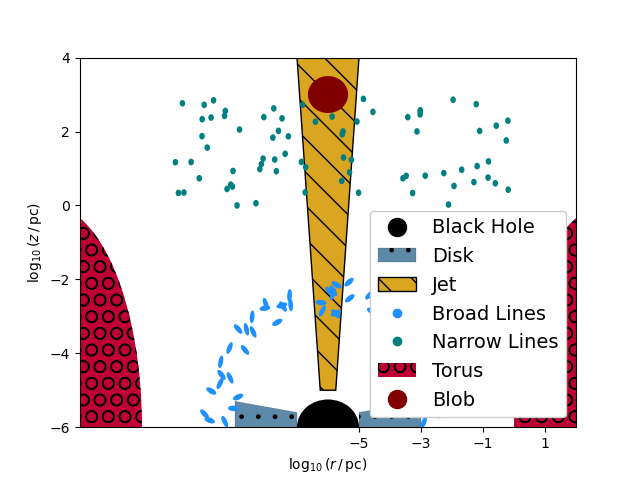

In [6]:
Image("../figures/AGN_scheme.png", width=800)

The only emission region currently available in the package is a simple spherical plasmoid, commonly referred to as _blob_ in the literature.

The blob represents a spherical region of plasma streaming along the jet.
The physical quantities _needed_ to define the `~agnpy.emission_regions.Blob` are:

- its radius, $R_{\rm b}$;
- its distance from the observer, expressed through the redshift $z$ of the host galaxy;
- the Doppler factor produced by the motion of the jet, $\delta_{\rm D} = \frac{1}{\Gamma(1 - \beta\cos(\theta_{\rm s}))}$. Where $\beta$ is the blob relativistic velocity, $\Gamma$ its bulk Lorentz factor, and $\theta_{\rm s}$ the angle between the jet axis and the observer's line of sight;
- the bulk Lorentz factor of the jet, $\Gamma$;
- the magnetic field tangled to the blob, $B$, assumed to be uniform; 
- the energy distributions of particles accelerated in the blob.

Follows a snippet initialising the `Blob` with its physical quantities and an electrons distribution.

In [7]:
# set the quantities defining the blob
R_b = 1e16 * u.cm
z = Distance(1e27, unit=u.cm).z
delta_D = 10
Gamma = 10
B = 1 * u.G

# electron distribution
n_e = BrokenPowerLaw(
    k=1e-8 * u.Unit("cm-3"),
    p1=1.9,
    p2=2.6,
    gamma_b=1e4,
    gamma_min=10,
    gamma_max=1e6,
    mass=m_e,
)

blob = Blob(R_b, z, delta_D, Gamma, B, n_e=n_e)

In [8]:
# we can always print the blob to check the quantities initialised
print(blob)

* Spherical emission region
 - R_b (radius of the blob): 1.00e+16 cm
 - t_var (variability time scale): 4.13e-01 d
 - V_b (volume of the blob): 4.19e+48 cm3
 - z (source redshift): 0.07 redshift
 - d_L (source luminosity distance):1.00e+27 cm
 - delta_D (blob Doppler factor): 1.00e+01
 - Gamma (blob Lorentz factor): 1.00e+01
 - Beta (blob relativistic velocity): 9.95e-01
 - theta_s (jet viewing angle): 5.74e+00 deg
 - B (magnetic field tangled to the jet): 1.00e+00 G
 - xi (coefficient for 1st order Fermi acceleration) : 1.00e+00
* electrons energy distribution
 - broken power law
 - k: 1.00e-08 1 / cm3
 - p1: 1.90
 - p2: 2.60
 - gamma_b: 1.00e+04
 - gamma_min: 1.00e+01
 - gamma_max: 1.00e+06



we can also add a proton distribution to the blob

In [9]:
# add a proton energy distribution
n_p = PowerLaw(k=0.1 * u.Unit("cm-3"), p=2.3, gamma_min=10, gamma_max=1e6, mass=m_p)
blob = Blob(R_b, z, delta_D, Gamma, B, n_e=n_e, n_p=n_p)

print(blob)

* Spherical emission region
 - R_b (radius of the blob): 1.00e+16 cm
 - t_var (variability time scale): 4.13e-01 d
 - V_b (volume of the blob): 4.19e+48 cm3
 - z (source redshift): 0.07 redshift
 - d_L (source luminosity distance):1.00e+27 cm
 - delta_D (blob Doppler factor): 1.00e+01
 - Gamma (blob Lorentz factor): 1.00e+01
 - Beta (blob relativistic velocity): 9.95e-01
 - theta_s (jet viewing angle): 5.74e+00 deg
 - B (magnetic field tangled to the jet): 1.00e+00 G
 - xi (coefficient for 1st order Fermi acceleration) : 1.00e+00
* electrons energy distribution
 - broken power law
 - k: 1.00e-08 1 / cm3
 - p1: 1.90
 - p2: 2.60
 - gamma_b: 1.00e+04
 - gamma_min: 1.00e+01
 - gamma_max: 1.00e+06
* protons energy distribution
 - power law
 - k: 1.00e-01 1 / cm3
 - p: 2.30
 - gamma_min: 1.00e+01
 - gamma_max: 1.00e+06



The blob instance contains more quantities than those we specified to initialize it. Once created, we can check, for example:

In [12]:
print("total electron number:", f"{blob.N_e_tot:.2e}")
print("total electron density:", f"{blob.n_e_tot:.2e}")
print("total energy in electrons:", f"{blob.W_e:.2e}")
print("total energy in protons:", f"{blob.W_p:.2e}")

total electron number: 2.33e+47
total electron density: 5.57e-02 1 / cm3
total energy in electrons: 2.25e+43 erg
total energy in protons: 1.02e+45 erg


We can also check the jet power in  kinetic energy of the particles $P_{\rm jet, ke}$ and in magnetic field $P_{\rm jet, B}$ (the power needed to expel a magnetic-field-laden plasma). The equilibrium between these two quantities defines a condition referred to as **equipartition**.

In [13]:
blob.P_jet_ke

<Quantity 4.6624287e+41 erg / s>

In [14]:
blob.P_jet_B

<Quantity 7.45724324e+43 erg / s>

## Exercises Section 6.1
### Exercise 6.1.1
Consider a blob of radius $R_b = 10^{17}\,{\rm cm}$, streaming along a jet with a Doppler factor $\delta_{\rm D}=20$ and bulk Lorentz factor $\Gamma=15$, in a galaxy sitting at redshift $z=0.5$. The blob is accelerating a power law of electrons with spectral index $p=2$, with Lorentz factors $\gamma_{\rm min} = 10$ and $\gamma_{\rm max} = 10^6$. Consider that the magnetic field is $0.1\,{\rm G}$ and set the normalisation of the electrons, $k$, such that the energy density of the electrons $u_{\rm e}\,[{\rm erg}\,{\rm cm}^{-3}]$ and the energy density in the magnetic field $U_B\,[{\rm erg}\,{\rm cm}^{-3}]$ are the same. $U_B$ is simply defined as
$$U_B = B^2 / (8\pi)$$
while the energy density in electrons is
$$ u_{\rm e} = m_{\rm e}c^2 \int_{\gamma_{\rm min}}^{\gamma_{\rm max}}{\rm d}\gamma\,\gamma\,n_{\rm e}(\gamma)$$

After you define the blob, you can access these quantities from the blob instance with `blob.U_B` and `blob.u_e`.

Is the jet at equipartition?